In [32]:
#import all the necessary libraries
import pandas as pd
import seaborn as sns
import operator

In [15]:
#load the dataset
covid_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-19-2020.csv")

In [12]:
#take a look at the original dataset
covid_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-20 02:32:25,32.3182,-86.9023,12376,504,NaN,11872.0,1,252.407364,157566.0,1453.0,4.072398,84000001,USA,3213.543850,11.740465
1,Alaska,US,2020-05-20 02:32:25,61.3707,-152.4044,400,10,348.0,42.0,2,54.678796,36380.0,NaN,2.500000,84000002,USA,4973.036519,NaN
2,American Samoa,US,2020-05-20 02:32:25,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-20 02:32:25,33.7298,-111.4312,14576,705,3693.0,10178.0,4,200.255072,161571.0,1746.0,4.836718,84000004,USA,2219.773073,11.978595
4,Arkansas,US,2020-05-20 02:32:25,34.9697,-92.3731,4923,102,3739.0,1082.0,5,163.131867,93701.0,535.0,2.071907,84000005,USA,3104.939883,10.867357


In [8]:
#there are extra cols, let's remove them and put them in a new dataset so we are not modifying the original one
#in case we need that back in the future
covid_modified = covid_data.drop(columns=['Last_Update', 'Lat', 'Long_', 'Country_Region', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate'])

In [16]:
#let's take a look at this new one now
#this will give you a list of total confirmed, deaths and recovered cases listed by the US states and cruise ships
covid_modified

,Province_State,Confirmed,Deaths,Recovered
0,Alabama,11771,488,NaN
1,Alaska,388,10,344.0
2,American Samoa,0,0,NaN
3,Arizona,13945,680,3450.0
4,Arkansas,4759,98,3590.0
5,California,80166,3240,NaN
6,Colorado,21938,1215,3346.0
7,Connecticut,37419,3408,6264.0
8,Delaware,7670,290,3478.0
9,Diamond Princess,49,0,NaN


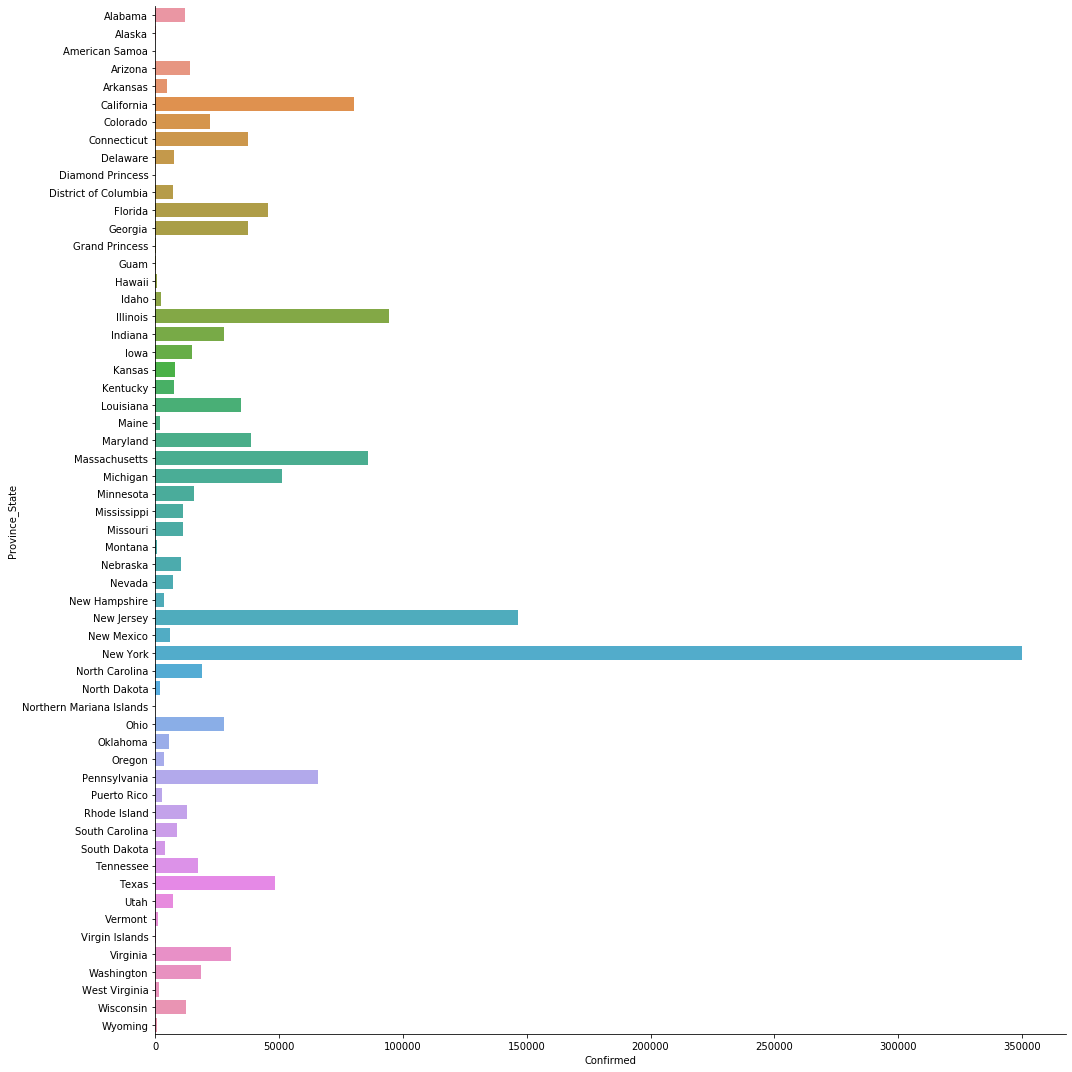

In [22]:
#since the previous list can be a bit tedious to read, let's present it in a way that is easier to read
sns.catplot(x='Confirmed',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)

#the same can be viewed for deaths and recovered cases, below is the code for that
#sns.catplot(x='Deaths',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)
#sns.catplot(x='Recovered',y='Province_State',data=covid_modified,kind='bar', height = 15, aspect=1)


In [84]:
#the last representation was a bit better and it was clear to see the New York topped the list.
#but what if you want to see the top 5 to top 10? Would the previous plot suffice? Probably not.
#so let's look at another way of presenting the list in a decreasing order.

provinces =  list(covid_modified['Province_State'])
confirmed = []
no_cases = [] 

for i in provinces:
    cases = covid_modified[covid_modified['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed.append(cases)
    else:
        no_cases.append(i)
    
# remove areas with no confirmed cases
for i in no_cases:
    provinces.remove(i)
    
provinces = [k for k, v in sorted(zip(provinces, confirmed), key=operator.itemgetter(1), reverse=True)]
for i in range(len(provinces)):
    confirmed[i] = covid_modified[covid_modified['Province_State']==provinces[i]]['Confirmed'].sum()


In [85]:
province_df = pd.DataFrame({'Province/State Name': provinces,'Number of Confirmed Cases': confirmed})

province_df.style.background_gradient(cmap='Blues')

,Province/State Name,Number of Confirmed Cases
0,New York,350121
1,New Jersey,146504
2,Illinois,94191
3,Massachusetts,86010
4,California,80166
5,Pennsylvania,65700
6,Michigan,51142
7,Texas,48396
8,Florida,45588
9,Maryland,38804


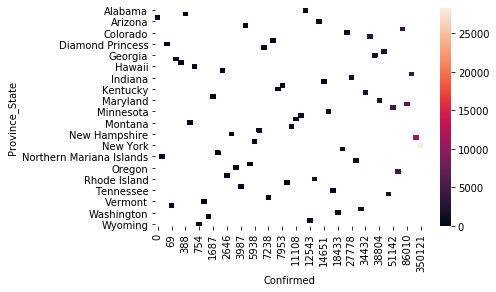

In [86]:
#another interested representation is a heatmap where it shows the deaths and confirmed cases by the states
#heatmap has the data in a matrix form
virus = covid_modified.pivot_table(values='Deaths',index='Province_State',columns='Confirmed')
sns.heatmap(virus)

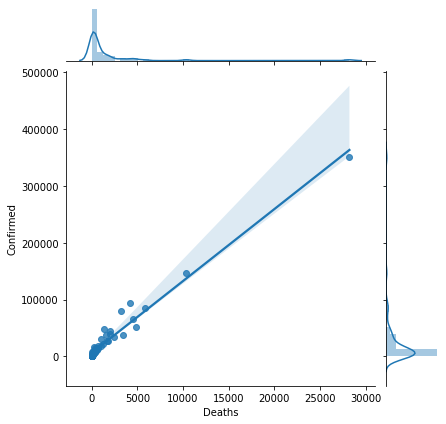

In [88]:
#grids can also be helpful way of representation
g = sns.JointGrid(x="Deaths", y="Confirmed", data=covid_modified)
g = g.plot(sns.regplot, sns.distplot)